# Simulating the Business Cycle with a Phillips Curve and Taylor Rule

This notebook builds a simple macroeconomic model combining:

- **Phillips Curve** → links inflation and the output gap  
- **Taylor Rule** → determines the policy interest rate  
- **Random economic shocks** → introduce volatility in the system  

The simulation helps visualize how **inflation**, **output gap**, and the **interest rate** interact over time.

## Model Equations

We model three core relationships:

### 1. Phillips Curve (inflation dynamics)

$$
\pi_t = \pi_{t-1} + \alpha \, y_t + \varepsilon^{(\pi)}_t
$$

where:  
- $\pi_t$ = inflation at time $t$  
- $y_t$ = output gap at time $t$  
- $\alpha$ = sensitivity of inflation to the output gap  
- $\varepsilon^{(\pi)}_t$ = random inflation shock  

### 2. Output Gap Dynamics

$$
y_t = \rho \, y_{t-1} + \varepsilon^{(y)}_t
$$

where:  
- $\rho$ = persistence of the output gap  
- $\varepsilon^{(y)}_t$ = random demand shock  

### 3. Taylor Rule (interest rate)

$$
i_t = r^* + \pi_t + \phi_\pi (\pi_t - \pi^*) + \phi_y y_t + \varepsilon^{(i)}_t
$$

where:  
- $i_t$ = nominal interest rate  
- $r^*$ = neutral real interest rate  
- $\pi^*$ = inflation target  
- $\phi_\pi, \phi_y$ = reaction coefficients to inflation and output gap  
- $\varepsilon^{(i)}_t$ = monetary policy shock

## 1. Importing Libraries and Setting Simulation Parameters

In this section we import the Python libraries needed for the model and define the length of the economic simulation.

## 2. Phillips Curve Model

The Phillips Curve describes how inflation responds to the output gap.  
We use a simple linear model:

\[
\pi_t = \pi_{t-1} + \alpha \cdot \text{output\_gap}_t + \epsilon_t
\]

Where:  
- \( \pi_t \) = inflation  
- output\_gap\_t = deviation of real GDP from potential  
- \( \epsilon_t \) = random shocks  

## 3. Taylor Rule for Monetary Policy

The central bank sets the interest rate according to:

\[
i_t = r^* + \pi_t + \phi_\pi(\pi_t - \pi^*) + \phi_y \cdot \text{output\_gap}_t
\]

This means the central bank reacts to:
- deviations of inflation from its target  
- the strength or weakness of the economy (output gap)

This creates realistic monetary policy behavior over the business cycle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros del modelo
T = 50                   # número de periodos
alpha = 0.5              # sensibilidad de inflación a la brecha del producto
phi_pi = 1.5             # reacción de Taylor a desviación de inflación
phi_y = 0.5              # reacción de Taylor al output gap
r_star = 1.0             # tasa neutral
pi_star = 2.0            # inflación objetivo

# Series iniciales
inflation = np.zeros(T)
output_gap = np.zeros(T)
interest_rate = np.zeros(T)

# Valores iniciales
inflation[0] = 2.0
output_gap[0] = -1.0

In [2]:
np.random.seed(123)

for t in range(1, T):
    shock = np.random.normal(0, 0.3)     # shock económico

    # Curva de Phillips
    inflation[t] = inflation[t-1] + alpha * output_gap[t-1] + shock

    # Output gap dinámico (simplemente vuelve lentamente a 0)
    output_gap[t] = 0.8 * output_gap[t-1] + np.random.normal(0, 0.2)

    # Regla de Taylor
    interest_rate[t] = (
        r_star 
        + inflation[t] 
        + phi_pi * (inflation[t] - pi_star)
        + phi_y * output_gap[t]
    )

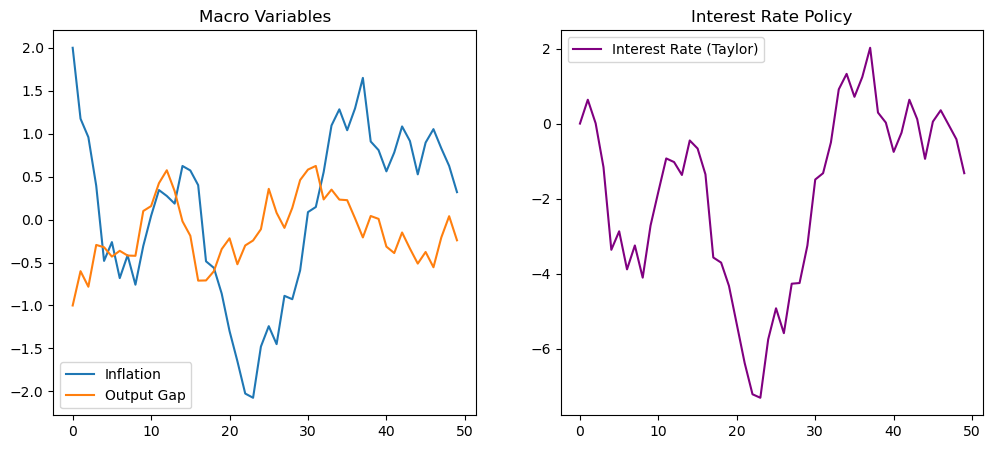

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(inflation, label='Inflation')
plt.plot(output_gap, label='Output Gap')
plt.title("Macro Variables")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(interest_rate, color="purple", label='Interest Rate (Taylor)')
plt.title("Interest Rate Policy")
plt.legend()

plt.show()

## 4. Results Analysis

### 4.1 Business cycle dynamics

In the first chart we observe the interaction between:

- **Inflation** (blue line)  
- **Output gap** (orange line)

Both variables fluctuate over time in a way that resembles a stylized business cycle:

- When the output gap increases (the economy runs above potential), inflation tends to rise.  
- When the output gap falls (the economy slows down), inflation also decreases.

These patterns are consistent with the Phillips Curve intuition: **stronger activity puts upward pressure on prices**, while weak activity reduces inflationary pressures.

---

### 4.2 Monetary policy response – Taylor rule

In the second chart we plot the **policy interest rate** implied by the Taylor rule.

Several patterns are visible:

- The interest rate responds aggressively when inflation deviates from its target.  
- It also reacts to movements in the output gap.  
- The resulting policy is clearly counter-cyclical:
  - **When the economy overheats and inflation rises → the policy rate increases.**
  - **When the economy cools down and inflation falls → the policy rate decreases.**

This captures the idea of a central bank that stabilizes the business cycle by adjusting interest rates.

---

### 4.3 Economic interpretation

Overall, the model reproduces the core macroeconomic mechanisms:

- The central bank adjusts monetary policy to keep inflation close to target.  
- Real activity responds to shocks and to changes in the interest rate.  
- Inflation and the output gap are positively correlated, generating realistic business-cycle-type dynamics.

Even though the model is intentionally simple, it is useful to:

- Build intuition for **macro trading** signals.  
- Prototype ideas for **economic research**.  
- Generate synthetic data to test **regime-switching** or **momentum** strategies in macro variables.

## Conclusiones y Trabajo Futuro

Este modelo demuestra cómo interactúan inflación, actividad económica y tasas de interés dentro de un ciclo macroeconómico sencillo.

### Próximos pasos posibles:
- Agregar un mercado financiero que dependa de la política monetaria.
- Añadir shocks externos (supply shocks, oil shocks, etc.).
- Implementar un modelo DSGE (Dynamic Stochastic General Equilibrium).
- Estimar los parámetros usando datos reales (FRED, Bloomberg).
- Convertir este notebook en una app interactiva usando **Dash**.

Con estas mejoras, este proyecto puede evolucionar en un portafolio profesional en macro & trading research.

## 5. Conclusions

This notebook shows how inflation, real activity and interest rates can be combined into a simple macroeconomic model using a Phillips Curve and a Taylor rule.

Key takeaways:

- The model generates plausible **business-cycle dynamics** for inflation and the output gap.  
- The Taylor rule produces a **systematic and transparent reaction function** for the policy rate.  
- Even with a small number of equations, we can visualize how monetary policy stabilizes the economy after shocks.

This type of framework is a good starting point for macro-oriented trading research and for communicating economic intuition to non-technical stakeholders.

---

## 6. Possible Extensions

There are several natural next steps to make the model richer and closer to production use:

- Add a **financial block** (e.g. bond yields or credit spreads) that depends on the policy rate.  
- Introduce **supply shocks** and distinguish them from demand shocks.  
- Estimate the model parameters using **real data** (e.g. FRED, Bloomberg) instead of choosing them by hand.  
- Embed the model in a **DSGE-style** framework or compare it against a more structural model.  
- Turn this notebook into an **interactive Dash app** where the user can change parameters (α, ϕπ, ϕy, shock volatility) and immediately see how the simulated paths change.

With these extensions, this project could evolve into a strong portfolio piece for macro research and systematic trading roles.